In [5]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , auc
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub 

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D

ModuleNotFoundError: No module named 'cv2'

In [ ]:
train_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
 train_path,
    batch_size=256,
  image_size=(224,224), shuffle=True
)

Found 70295 files belonging to 38 classes.


In [ ]:
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
 valid_path,
    batch_size=256,
  image_size=(224,224), shuffle=True
)

Found 17572 files belonging to 38 classes.


In [ ]:
path = "/kaggle/input/new-plant-diseases-dataset/test/test"
test_folder = os.listdir(path)
test_folder[:5]

['TomatoEarlyBlight6.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus6.JPG',
 'PotatoHealthy2.JPG',
 'TomatoYellowCurlVirus5.JPG']

In [ ]:
len(train_data.class_names)

38

In [ ]:
class_labels = train_data.class_names
class_labels

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Use the 'datagen' to preprocess the images loaded by 'image_data_from_directory'
train_scaled_data = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=256,shuffle=True,
    class_mode='sparse'
)

# test_scaled_data = datagen.flow_from_directory(
#     "/kaggle/input/100-bird-species/test",
#     target_size=(224, 224),
#     batch_size=256,shuffle=True
# )

valid_scaled_data = datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=256,shuffle=True,
    class_mode='sparse'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
train_scaled_data.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
for img, label in train_scaled_data:
    #print(img)
    print(label)
    break

[28. 20. 14. 18. 36. 27.  9. 15. 28. 31. 15. 12. 35. 12. 28. 18. 36. 18.
  6. 20. 22.  2. 31. 12.  0. 11. 31. 20. 13. 16. 34. 34. 23. 28. 28. 16.
  7. 31. 34. 18. 26.  0. 12. 37. 21.  7.  3.  3. 15. 31.  1. 34. 33. 12.
  1. 32. 27. 23. 22. 28. 13. 14.  6. 34.  5.  6.  0. 13. 18. 17.  5. 35.
 28. 14. 35. 28. 24. 28. 25. 32.  3. 13.  1.  3. 26.  4.  8.  6. 26. 19.
 27. 19.  4. 21. 18. 16. 29. 22. 31.  6.  4. 36. 18.  4. 25. 15. 25. 34.
 21. 32. 14. 32.  2. 12. 24. 15.  0. 27. 30.  4. 19. 10. 14.  9.  6. 33.
 11.  2. 32. 12. 25. 24.  7. 31.  2. 18. 18. 11. 26. 31.  5. 27. 26.  0.
 29. 12.  2. 13.  4. 19.  1. 29. 34. 31. 32. 23. 15. 23. 34. 23. 26.  1.
 31. 24. 28. 34. 36. 24. 12. 24. 21. 15. 20.  7. 16. 21. 17. 10. 15. 17.
  3. 32. 24.  6. 18. 14. 18. 35. 16. 13. 13. 24. 18. 35. 21.  5. 29.  7.
 11. 24. 15.  0. 32. 24. 15.  1. 17. 25.  2.  8. 26. 12.  9.  0. 25. 27.
  6.  0.  9. 31. 19. 30. 15. 19. 20.  0. 18. 21. 22.  0. 20. 28. 31. 20.
 11.  7. 23.  2. 29. 12. 35. 16. 26. 28. 12. 37. 17

In [ ]:
label[10]

15.0

In [ ]:
len(class_labels)

38

In [ ]:
# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=(224,224,3),
                         include_top=False, weights='imagenet')

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a Sequential model
model = Sequential()

model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(100, activation='relu'))  # Add a dense layer with 1024 units
model.add(Dense(100, activation='relu'))   # Add another dense layer with 512 units
model.add(Dense(len(class_labels), activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3, 
                               restore_best_weights=True)

history = model.fit(train_scaled_data ,batch_size=256,epochs=100,
                verbose=1,
                validation_data=valid_scaled_data,
                callbacks=[early_stopping]) # epochs=5

Epoch 1/100


2024-06-23 09:16:07.264734: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=2} for conv (f32[256,32,112,112]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,32,112,112]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=32, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-23 09:16:07.283498: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.018859076s
Trying algorithm eng3{k11=2} for conv (f32[256,32,112,112]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,32,112,112]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=32, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a wh

 12/275 ━━━━━━━━━━━━━━━━━━━━ 15:05 3s/step - accuracy: 0.0948 - loss: 3.5359

W0000 00:00:1719134226.926903      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6609 - loss: 1.3152

W0000 00:00:1719134769.721849      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719134930.221574      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


275/275 ━━━━━━━━━━━━━━━━━━━━ 792s 3s/step - accuracy: 0.6615 - loss: 1.3128 - val_accuracy: 0.9248 - val_loss: 0.2401
Epoch 2/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 218s 775ms/step - accuracy: 0.9367 - loss: 0.2008 - val_accuracy: 0.9351 - val_loss: 0.1932
Epoch 3/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 215s 767ms/step - accuracy: 0.9543 - loss: 0.1420 - val_accuracy: 0.9459 - val_loss: 0.1641
Epoch 4/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 217s 775ms/step - accuracy: 0.9648 - loss: 0.1094 - val_accuracy: 0.9546 - val_loss: 0.1373
Epoch 5/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 222s 792ms/step - accuracy: 0.9726 - loss: 0.0857 - val_accuracy: 0.9543 - val_loss: 0.1340
Epoch 6/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 227s 809ms/step - accuracy: 0.9777 - loss: 0.0701 - val_accuracy: 0.9549 - val_loss: 0.1347
Epoch 7/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 218s 778ms/step - accuracy: 0.9820 - loss: 0.0592 - val_accuracy: 0.9556 - val_loss: 0.1373
Epoch 8/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 220s 785ms/step - accuracy: 0.9834 - loss: 

In [ ]:
# Save The Model
# model.save("plant_disease_model.h5")

In [ ]:
# Save the model to .tflifte format (for React Native app)
model.save("plant_disease_model.tflite")

In [ ]:
loss,acc = model.evaluate(train_scaled_data)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(valid_scaled_data)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

275/275 ━━━━━━━━━━━━━━━━━━━━ 180s 653ms/step - accuracy: 0.9915 - loss: 0.0295


W0000 00:00:1719137795.234602      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Loss on Train data: 0.029700370505452156
Accuracy on Train data: 0.9911942481994629
69/69 ━━━━━━━━━━━━━━━━━━━━ 44s 640ms/step - accuracy: 0.9616 - loss: 0.1191
Loss on Test data: 0.11479122936725616
Accuracy on Test data: 0.9635784029960632


In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

ValueError: x and y must have same first dimension, but have shapes (11,) and (13,)

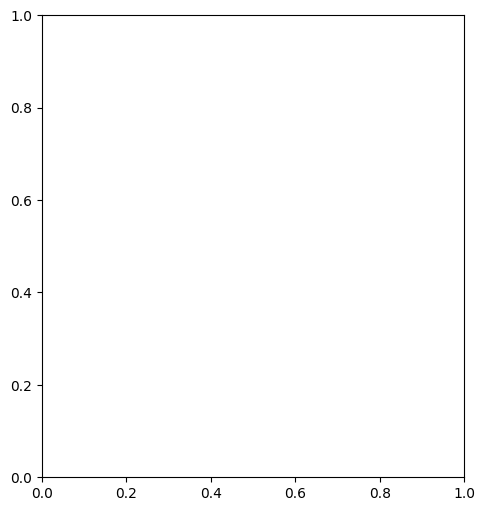

In [ ]:
EPOCHS=11
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

## Predicting On Test Data

In [ ]:
# Load the test image
from tensorflow.keras.preprocessing import image
img_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'
img_path = "/kaggle/input/new-plant-diseases-dataset/test/test/AppleScab1.JPG"
img = image.load_img(img_path, target_size=(224, 224))
#img
img_array = image.img_to_array(img)
print(img_array.shape) 
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
# Scale The Data
img_array = img_array/255
print(img_array.shape)

In [ ]:
y_pred = model.predict(img_array)
y_pred

In [ ]:
np.argmax(y_pred[0])

In [ ]:
len(y_pred[0])

In [ ]:
class_labels[np.argmax(y_pred[0])]

In [ ]:
dict_class = {'Label':class_labels}
dict_class

In [ ]:
dict_class['Label'][2]

In [ ]:
import json

with open("class_labels.json",'w') as file:
    json.dump(dict_class,file)

In [ ]:
# Function to make predict
import tensorflow as tf
import numpy as np

loaded_model = tf.keras.models.load_model('/kaggle/working/plant_disease_model.h5')

# Function to load and preprocess image
def load_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convert single image to a batch
    img_array = img_array / 255.0  # Normalize the image as done in preprocessing
    return img_array

# Example usage
img_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'
img = load_image(img_path)
predictions = loaded_model.predict(img)
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')
print(class_labels[int(predicted_class)] )


# Make prediction for all test images

In [ ]:
import os
import tensorflow as tf
import numpy as np

# Load the trained model
loaded_model = tf.keras.models.load_model('/kaggle/working/plant_disease_model.h5')

# Function to load and preprocess image
def load_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convert single image to a batch
    img_array = img_array / 255.0  # Normalize the image as done in preprocessing
    return img_array

# Example usage
test_folder = '/kaggle/input/new-plant-diseases-dataset/test/test/'

def predict_images_in_folder(test_folder):
    for file in os.listdir(test_folder):
        img_path = os.path.join(test_folder, file)
        img = load_image(img_path)
        predictions = loaded_model.predict(img)
        predicted_class = np.argmax(predictions, axis=1)[0]  # Extract single prediction
        print(f'Image: {file}, Predicted class: {predicted_class}, Predicted label: {file}')

# Call function to predict and compare labels for all images in the test folder
predict_images_in_folder(test_folder)
